**THE BACKTESTING RESULTS AND THE EQUITY CURVE ARE AT THE END**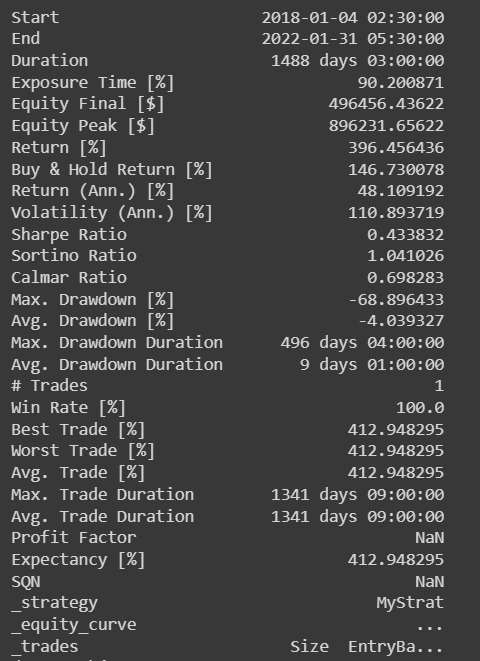

In [1]:
import pandas as pd

In [2]:
!pip install yfinance

In [3]:
import yfinance as yf

In [10]:
df=pd.read_csv('btc_1h.csv')

In [11]:
df.head()

datetime      open      high       low     close      volume
0  2018-01-01 05:30:00  13715.65  13715.65  13400.01  13529.01  443.356199
1  2018-01-01 06:30:00  13528.99  13595.89  13155.38  13203.06  383.697006
2  2018-01-01 07:30:00  13203.00  13418.43  13200.00  13330.18  429.064572
3  2018-01-01 08:30:00  13330.26  13611.27  13290.00  13410.03  420.087030
4  2018-01-01 09:30:00  13434.98  13623.29  13322.15  13601.01  340.807329

In [6]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=cde411d0753a76b933679220020b7d159e7c8954a9224d8277b205df43edff60
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [12]:
import pandas_ta as ta

In [13]:
df['daily_return'] = df['close'].pct_change()

# Define the window for calculating volatility (e.g., 20 for a 20-day volatility)
volatility_window = 20

# Calculate volatility using the standard deviation of daily returns
df['volatility'] = df['daily_return'].rolling(window=volatility_window).std()

# Drop NaN values resulting from the rolling calculation
df = df.dropna()

In [14]:
df['EMA']=ta.sma(df.close, length=50)#sma ema
df['RSI']=ta.rsi(df.close, length=2)
#df.ta.indicators()
#help(ta.bbands)
my_bbands = ta.bbands(df.close, length=20, std=2.5)
my_bbands[0:50]
df=df.join(my_bbands)
df.dropna(inplace=True)
df.reset_index(inplace=True)
df

index             datetime      open      high       low     close  \
0         69  2018-01-04 02:30:00  14939.11  14990.00  14830.00  14926.96   
1         70  2018-01-04 03:30:00  14926.96  14949.00  14799.64  14799.91   
2         71  2018-01-04 04:30:00  14792.32  14940.82  14710.00  14919.51   
3         72  2018-01-04 05:30:00  14919.51  14948.00  14710.25  14753.76   
4         73  2018-01-04 06:30:00  14765.65  15179.00  14649.99  15172.12   
...      ...                  ...       ...       ...       ...       ...   
35590  35659  2022-01-31 01:30:00  37512.37  37740.00  37351.63  37684.45   
35591  35660  2022-01-31 02:30:00  37684.45  37762.60  37492.25  37729.00   
35592  35661  2022-01-31 03:30:00  37729.00  37855.54  37625.41  37785.78   
35593  35662  2022-01-31 04:30:00  37785.78  38230.00  37778.46  37881.76   
35594  35663  2022-01-31 05:30:00  37881.75  37951.07  36828.32  36829.30   

            volume  daily_return  volatility         EMA        RSI  \
0       191.636316      0.000064    0.014953  14235.2106  77.946759   
1       260.659165     -0.008511    0.014792  14263.2240  29.349574   
2       648.924200      0.008081    0.014629  14291.9940  67.499334   
3       820.846740     -0.011110    0.014503  14318.0292  27.035621   
4      1181.627263      0.028356    0.015891  14353.8716  81.877457   
...            ...           ...         ...         ...        ...   
35590  1037.922560      0.004587    0.004290  37855.0142  48.509877   
35591   874.060520      0.001182    0.004236  37865.1370  57.781508   
35592   734.658550      0.001505    0.004251  37865.6924  71.063347   
35593  1728.811800      0.002540    0.004291  37867.5502  85.977461   
35594  2907.710960     -0.027783    0.007409  37851.0360   6.988181   

         BBL_20_2.5  BBM_20_2.5    BBU_20_2.5  BBB_20_2.5  BBP_20_2.5  
0      14329.428040  14859.8470  15390.265960    7.138956    0.563264  
1      14325.106826  14849.4390  15373.771174    7.061980    0.452769  
2      14329.133162  14854.4900  15379.846838    7.073374    0.561882  
3      14322.022086  14841.1950  15360.367914    6.996376    0.415794  
4      14305.884504  14850.4010  15394.917496    7.333357    0.795417  
...             ...         ...           ...         ...         ...  
35590  37537.221981  37956.4560  38375.690019    2.209026    0.175592  
35591  37509.178152  37946.3185  38383.458848    2.303993    0.251432  
35592  37492.253472  37938.0175  38383.781528    2.349960    0.329240  
35593  37489.551435  37936.2490  38382.946565    2.354991    0.439009  
35594  37131.841469  37872.7470  38613.652531    3.912605   -0.204170  

[35595 rows x 16 columns]

In [15]:
def addemasignal(df, backcandles):
    emasignal = [0]*len(df)
    for row in range(backcandles, len(df)):
        upt = 1
        dnt = 1
        for i in range(row-backcandles, row+1):
            if df.high[i]>=df.EMA[i]:
                dnt=0
            if df.low[i]<=df.EMA[i]:
                upt=0
        if upt==1 and dnt==1:
            #print("!!!!! check trend loop !!!!")
            emasignal[row]=3
        elif upt==1:
            emasignal[row]=2
        elif dnt==1:
            emasignal[row]=1
    df['EMASignal'] = emasignal

addemasignal(df, 6)

In [16]:
def addorderslimit(df, percent):
    ordersignal=[0]*len(df)
    for i in range(1, len(df)): #EMASignal of previous candle!!! modified!!!
        if df.EMASignal[i]==2 and df.close[i]<=df['BBL_20_2.5'][i]:# and df.RSI[i]<=100: #Added RSI condition to avoid direct close condition
            ordersignal[i]=df.close[i]-df.close[i]*percent
        elif df.EMASignal[i]==1 and df.close[i]>=df['BBU_20_2.5'][i]:# and df.RSI[i]>=0:
            ordersignal[i]=df.close[i]+df.close[i]*percent
    df['ordersignal']=ordersignal

addorderslimit(df, 0.00)

In [17]:
df[df.ordersignal!=0]

index             datetime      open      high       low     close  \
3487    3556  2018-05-30 19:30:00   7506.93   7512.45   7352.00   7374.45   
3784    3853  2018-06-12 04:30:00   6780.36   6922.00   6780.35   6872.00   
4070    4139  2018-06-24 02:30:00   6129.05   6231.00   6128.05   6212.62   
4288    4357  2018-07-03 15:30:00   6615.50   6617.02   6519.99   6563.36   
5172    5241  2018-08-09 18:30:00   6254.10   6475.00   6178.60   6416.21   
6131    6200  2018-09-18 17:30:00   6287.65   6346.00   6267.00   6328.92   
6223    6292  2018-09-22 13:30:00   6719.31   6720.06   6627.00   6647.63   
7392    7461  2018-11-10 09:30:00   6436.77   6472.57   6432.65   6454.00   
9965   10034  2019-02-25 21:30:00   3808.96   3857.64   3801.09   3852.82   
9967   10036  2019-02-25 23:30:00   3836.39   3871.27   3831.88   3868.77   
10149  10218  2019-03-05 13:30:00   3729.19   3747.00   3728.15   3744.51   
13952  14021  2019-08-11 16:30:00  11343.00  11482.86  11343.00  11469.94   
14049  14118  2019-08-16 01:30:00  10106.68  10393.29  10090.57  10370.00   
14596  14665  2019-09-07 20:30:00  10403.17  10469.86  10400.62  10455.64   
15385  15454  2019-10-10 17:30:00   8526.02   8526.02   8414.52   8461.22   
15549  15618  2019-10-17 13:30:00   7974.42   8077.77   7971.80   8047.27   
15550  15619  2019-10-17 14:30:00   8045.85   8066.28   8016.44   8063.57   
16604  16673  2019-11-30 16:30:00   7709.04   7718.02   7623.38   7656.21   
16606  16675  2019-11-30 18:30:00   7683.58   7690.98   7621.00   7635.06   
17162  17231  2019-12-23 22:30:00   7524.01   7557.13   7361.01   7390.51   
18582  18651  2020-02-21 08:30:00   9643.54   9714.06   9609.93   9708.17   
20938  21007  2020-05-29 15:30:00   9444.99   9472.00   9356.00   9365.00   
21058  21127  2020-06-03 15:30:00   9523.07   9622.01   9522.18   9591.07   
21059  21128  2020-06-03 16:30:00   9591.77   9620.12   9568.20   9618.57   
29840  29909  2021-06-05 05:30:00  36829.15  37800.00  36613.22  37684.66   
30291  30360  2021-06-24 00:30:00  33292.57  33568.96  32870.99  32879.97   
32714  32783  2021-10-03 05:30:00  47634.89  47808.19  47088.00  47272.06   
32820  32889  2021-10-07 15:30:00  54300.57  54432.49  53811.00  53906.62   
33038  33107  2021-10-16 17:30:00  61597.26  61605.81  60398.73  60679.14   
34042  34111  2021-11-27 13:30:00  54394.55  55280.00  54394.55  55055.65   

            volume  daily_return  volatility         EMA        RSI  \
3487   2551.597923     -0.018102    0.005737   7333.2732   3.363618   
3784   2198.459682      0.012525    0.007781   6949.9158  99.657040   
4070   1329.944772      0.013635    0.005617   6271.7564  94.782866   
4288   4693.665666     -0.007656    0.002771   6464.9232   2.770683   
5172   4849.469814      0.025916    0.007577   6539.6218  82.349263   
6131   2440.873334      0.006564    0.003685   6387.7990  92.870133   
6223   3349.872674     -0.010559    0.004370   6597.1060   1.468009   
7392    388.169478      0.003001    0.002483   6478.2182  97.096491   
9965   3381.901031      0.011515    0.004798   3943.1560  94.571999   
9967   3056.277498      0.008440    0.004863   3939.0468  83.464030   
10149  1390.912678      0.004105    0.002060   3758.7938  92.909763   
13952  2217.302324      0.011207    0.003977  11604.4498  88.821546   
14049  4849.603941      0.026054    0.009767  10502.3782  97.750379   
14596  1654.849590      0.005041    0.003374  10522.9908  92.014160   
15385  3386.750390     -0.007400    0.003527   8347.6642   9.505090   
15549  3312.628683      0.009027    0.003366   8104.1082  92.512190   
15550  1592.001787      0.002026    0.003373   8099.7588  94.470284   
16604  2928.742824     -0.006849    0.003402   7612.0116   1.968072   
16606  1578.521354     -0.006232    0.003321   7619.2092  17.686498   
17162  6609.674593     -0.017738    0.007081   7326.9322   5.699586   
18582  2887.788061      0.006699    0.004467   9801.8518  95.945580   
20938  4393.808079     -0.008470    0.004415   9306.1362 

In [18]:
import numpy as np
def pointposbreak(x):
    if x['ordersignal']!=0:
        return x['ordersignal']
    else:
        return np.nan
df['pointposbreak'] = df.apply(lambda row: pointposbreak(row), axis=1)

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

dfpl = df
#dfpl=dfpl.drop(columns=['level_0'])#!!!!!!!!!!
#dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close']),
                go.Scatter(x=dfpl.index, y=dfpl.EMA, line=dict(color='orange', width=2), name="EMA"),
                go.Scatter(x=dfpl.index, y=dfpl['BBL_20_2.5'], line=dict(color='blue', width=1), name="BBL_20_2.5"),
                go.Scatter(x=dfpl.index, y=dfpl['BBU_20_2.5'], line=dict(color='blue', width=1), name="BBU_20_2.5")])

fig.add_scatter(x=dfpl.index, y=dfpl['pointposbreak'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="Signal")
fig.show()

In [20]:
dfpl = df[:].copy()
def SIGNAL():
    return df.ordersignal

In [21]:
!pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173916 sha256=afea72403602047d9159adb0661606cc9d1974fad63ece600fbf85f471cc70e1
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


In [ ]:
!pip install -U backtesting

In [ ]:
dfpl.head()

index             datetime      open      high       low     close  \
0     69  2018-01-04 02:30:00  14939.11  14990.00  14830.00  14926.96   
1     70  2018-01-04 03:30:00  14926.96  14949.00  14799.64  14799.91   
2     71  2018-01-04 04:30:00  14792.32  14940.82  14710.00  14919.51   
3     72  2018-01-04 05:30:00  14919.51  14948.00  14710.25  14753.76   
4     73  2018-01-04 06:30:00  14765.65  15179.00  14649.99  15172.12   

        volume  daily_return  volatility  MACD_12_26_9  ...         EMA  \
0   191.636316      0.000064    0.014953    121.619548  ...  14235.2106   
1   260.659165     -0.008511    0.014792    110.176636  ...  14263.2240   
2   648.924200      0.008081    0.014629    109.333710  ...  14291.9940   
3   820.846740     -0.011110    0.014503     94.409857  ...  14318.0292   
4  1181.627263      0.028356    0.015891    114.529435  ...  14353.8716   

         RSI    BBL_20_2.5  BBM_20_2.5    BBU_20_2.5  BBB_20_2.5  BBP_20_2.5  \
0  77.946759  14329.428040   14859.847  15390.265960    7.138956    0.563264   
1  29.349574  14325.106826   14849.439  15373.771174    7.061980    0.452769   
2  67.499334  14329.133162   14854.490  15379.846838    7.073374    0.561882   
3  27.035621  14322.022086   14841.195  15360.367914    6.996376    0.415794   
4  81.877457  14305.884504   14850.401  15394.917496    7.333357    0.795417   

   EMASignal  ordersignal  pointposbreak  
0          0          0.0            NaN  
1          0          0.0            NaN  
2          0          0.0            NaN  
3          0          0.0            NaN  
4          0          0.0            NaN  

[5 rows x 22 columns]

RangeIndex(start=0, stop=35595, step=1)

In [22]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [23]:
df.set_index(df['datetime'],inplace=True)

In [28]:
df1 = df[['Open','High','Low','Close','Volume','EMA','EMASignal']]

In [25]:
# Assuming your DataFrame is named df1
df = df.rename(columns={
    'open': 'Open',
    'high': 'High',
    'close': 'Close',
    'low': 'Low',
    'volume': 'Volume',
})

In [29]:
df1.head()

Open      High       Low     Close       Volume  \
datetime                                                                   
2018-01-04 02:30:00  14939.11  14990.00  14830.00  14926.96   191.636316   
2018-01-04 03:30:00  14926.96  14949.00  14799.64  14799.91   260.659165   
2018-01-04 04:30:00  14792.32  14940.82  14710.00  14919.51   648.924200   
2018-01-04 05:30:00  14919.51  14948.00  14710.25  14753.76   820.846740   
2018-01-04 06:30:00  14765.65  15179.00  14649.99  15172.12  1181.627263   

                            EMA  EMASignal  
datetime                                    
2018-01-04 02:30:00  14235.2106          0  
2018-01-04 03:30:00  14263.2240          0  
2018-01-04 04:30:00  14291.9940          0  
2018-01-04 05:30:00  14318.0292          0  
2018-01-04 06:30:00  14353.8716          0

In [32]:
from backtesting import Strategy
from backtesting import Backtest

class MyStrat(Strategy):
    initsize = 0.99
    ordertime=[]
    def init(self):
        super().init()
        self.signal = self.I(SIGNAL)

    def next(self):
        super().next()

        for j in range(0, len(self.orders)):
            #print('!!!!!!!!!!!!!!!!!!!', self.data.index[-1])
            if (self.data.index[-1] - self.ordertime[0]).total_seconds() > 5:
                #print('----------------------')
                #print(self.orders)
                #print(self.ordertime)
                self.orders[0].cancel()
                self.ordertime.pop(0)

        # if len(self.trades)>0:
        #     #print(self.data.index[-1], self.trades)
        #     if self.data.index[-1]-self.trades[-1].entry_time>=10:
        #         self.trades[-1].close()
        #         #print(self.data.index[-1], self.trades[-1].entry_time)

        #     if self.trades[-1].is_long and self.data.RSI[-1]>=50:
        #         self.trades[-1].close()
        #     elif self.trades[-1].is_short and self.data.RSI[-1]<=50:
        #         self.trades[-1].close()

        if self.signal!=0 and len(self.trades)==0 and self.data.EMASignal==2:
            #Cancel previous orders
            for j in range(0, len(self.orders)):
                self.orders[0].cancel()
                self.ordertime.pop(0)
            #Add new replacement order
            self.buy(sl=self.signal/2, limit=self.signal, size=self.initsize)
            self.ordertime.append(self.data.index[-1])

        elif self.signal!=0 and len(self.trades)==0 and self.data.EMASignal==1:
            #Cancel previous orders
            for j in range(0, len(self.orders)):
                self.orders[0].cancel()
                self.ordertime.pop(0)
            #Add new replacement order
            self.sell(sl=self.signal*2, limit=self.signal, size=self.initsize)
            self.ordertime.append(self.data.index[-1])

bt = Backtest(df1, MyStrat, cash=100000, margin=0.99, commission=.0015)
stat = bt.run()
stat

Start                     2018-01-04 02:30:00
End                       2022-01-31 05:30:00
Duration                   1488 days 03:00:00
Exposure Time [%]                   90.200871
Equity Final [$]                 496456.43622
Equity Peak [$]                  896231.65622
Return [%]                         396.456436
Buy & Hold Return [%]              146.730078
Return (Ann.) [%]                   48.109192
Volatility (Ann.) [%]              110.893719
Sharpe Ratio                         0.433832
Sortino Ratio                        1.041026
Calmar Ratio                         0.698283
Max. Drawdown [%]                  -68.896433
Avg. Drawdown [%]                   -4.039327
Max. Drawdown Duration      496 days 04:00:00
Avg. Drawdown Duration        9 days 01:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     412.948295
Worst Trade [%]                    412.948295
Avg. Trade [%]                    

In [33]:
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:122: UserWarning:

Data contains too many candlesticks to plot; downsampling to '4H'. See `Backtest.plot(resample=...)`

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:148: FutureWarning:

Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:148: FutureWarning:

Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

/usr/local

GridPlot(id='p1350', ...)